# Deep Learning 

## Background

Machine learning has conquered our digital space in a much conceivable way. Aritifical Intelligence is the umbrella discipline that describes the varied notions of the systemic behavior akin to humans. Unlike the common held adage, **Deep Learning** isn't a part of Machine Learning per se, rather it has evolved to be an exclusive stream altogether.  
If we recall from the previous session, we discussed the relevance of decision trees and random forests and how crucial former is to the latter. The diversity and aggregation of results in the random forests engender them the alacrity to handle multidimensional data. Although, neural nets do not foster the *same* relationship with deep learning, it is of the utmost importance to fathom the concept prior to proceeding to the holistic theme of deep learning. 

<img src="./props/AI_branches.jpg">

As mentioned above, deep learning is founded on **neural networks** that have, generally, outperformed other classification algorithms like Support Vector Machines (SVM), logistic regression, etc. *Neural Networks* are a specialized set of algorithms that work on assigning and moderating weights from the original data (input), across through the layers to the classification result (ouput).  

<img src="./props/deep_learning_NN_better.jpg">

### Exercise

> Loosely, Neural Networks is to Deep Learning as ________ is to Random Forests.

## Package Installation

## keras

#### Installation Errors

There could be subjective instances of errors that a system would result, owing to some missing or conflicting dependencies. Few encountered are as under:

<img src="./props/install_keras_error.jpg">

The TensorFlow is the Google's offering for machine learning and deep learning related tasks; *Anaconda* and *Python* libraries are major requisites for *TensorFlow* deployment in R. 

<img src="./props/install_keras_error1.jpg">

Often,
- there is a missing declaration in the PATH variable, or 
- *Anaconda* and *Python* installations have suffered shadowing from the other. 

<img src="./props/install_keras_error2.jpg">

## neuralnet

In [6]:
## Install the package and load the library

install.packages("neuralnet", 
                 repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                 dependencies = TRUE)
library(neuralnet)


The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmppeIYgb/downloaded_packages


## Dataset Preparation

The *iris* dataset has been chosen for illustrating the use of the neural networks and deep learning via the listed packages. The dataset has been modified to accomodate binary class scheme- leaf or flower. These have been explicitly incorporated into the dataset.

Let's check out the dataset. 

In [7]:
## Let us consider our example dataset
d <- iris
str(d)

## Introduce a novel class definition.
## 0 signifies a leaf and 1, a flower.

d$class <- as.integer(sample(c(0,1)))
str(d$class)

## Remove the original classification of the flower type.
d <- d[,-5]

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
 int [1:150] 1 0 1 0 1 0 1 0 1 0 ...


In [8]:
str(d)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ class       : int  1 0 1 0 1 0 1 0 1 0 ...


As we look now, the dataset looks in close viability for application to the deep learning module. The only caveat is that the neural networks warrant the data spread between 0 and 1, for mirroring results in probability terms. Also, if chosen the sigmoid activation function shall also restrict the output in the similar range.

So if it isn't already, some sort of normalization procedure can help do that. The preferred one is the min-max normalization.

In [9]:
# Min-Max normalization
d$Sepal.Length <- (d$Sepal.Length-min(d$Sepal.Length, na.rm = T))/(max(d$Sepal.Length, na.rm = T)-min(d$Sepal.Length, na.rm = T))
d$Sepal.Width <- (d$Sepal.Width-min(d$Sepal.Width, na.rm = T))/(max(d$Sepal.Width, na.rm = T)-min(d$Sepal.Width, na.rm = T))
d$Petal.Length <- (d$Petal.Length-min(d$Petal.Length, na.rm = T))/(max(d$Petal.Length, na.rm = T)-min(d$Petal.Length, na.rm = T))
d$Petal.Width <- (d$Petal.Width-min(d$Petal.Width, na.rm = T))/(max(d$Petal.Width, na.rm = T)-min(d$Petal.Width, na.rm = T))


Let us now formalize the dataset and bifurcate it further into training and test cases.

In [10]:
# Let us shuffle the dataset for fair distribution of classes.
d2 <- d[sample(nrow(d)),]

# Data Partition
set.seed(108)
ind <- sample(2, nrow(d2), replace = TRUE, prob = c(0.7, 0.3))
training <- d2[ind==1,]
testing <- d2[ind==2,]

>Excercise:  
As noted, the data is partitioned in a proportion of 7:3. Try if a different proportion, eg. 8:2 makes any difference in the final result.

Let us now execute the models from different packages. 

## Executing 'neuralnet'

In [11]:
# Neural Networks
set.seed(007)
nn <- neuralnet(class~Sepal.Length+Sepal.Width+Petal.Length+Petal.Width,
               data = training,
               hidden = 5,
               err.fct = "sse",
               act.fct = "logistic",
               linear.output = FALSE)


We can also plot the model to have a graphical visualization of the network.

In [13]:
plot(nn)

<img src="./props/Nn_Example2.png">

>Excercise:  
Check out the error and number of steps. Try if manipulating the number of hidden nodes/layers (as parameter to the neuralnet function) and error function, if given "ce" (class entropy) instead of "sse" (sum of square errors) makes any difference. These shall also have an impact on the overall accuracy of the model as we learn to calculate further.

In [15]:
# Prediction
output <- compute(nn, training[,-5])
head(output$net.result)
head(training[1,])

103,0.028754278
15,0.999994466
118,0.005112765
136,0.003943153
67,0.718266078
22,0.042962243


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
103,0.7777778,0.4166667,0.8305085,0.8333333,1


Note, how the prediction is made. As reflected in the above graphic, we have a set of weights calculated by the model and some error terms (marked in blue). As an example, let us highlight the input and output to the node 5 (in order).

In [17]:
in5 <- -0.27206 + (0.7777778*-6.9519)+(0.4166667*1.11426)+(0.8305085*1.25498)+(0.8333333*1.02952)
print(in5)
out5 <- (1/1+exp(-in5))
print(out5)

[1] -3.314614
[1] 28.51176


Similarly, calculations can be done for other nodes as well.

The next step is to ascertain the overall accuracy of the model in terms of misclassification error.

In [24]:
# Confusion Matrix & Misclassification Error - training data
output <- compute(nn, training[,-5])
p1 <- output$net.result
pred1 <- ifelse(p1>0.5, 1, 0)
tab1 <- table(pred1, training$class)
tab1
ac <- sum(diag(tab1))/sum(tab1) #accuracy#
me <- 1 - ac
cat("The misclassification error is", me)

     
pred1  0  1
    0 50 15
    1  8 37

The misclassification error is 0.2090909

We are calculating the misclassification error on training data. Intuitively, it should be low because that is the data out of which neural network model was built over. Nonetheless, it is about 21 percent which can still be improved upon. The table shows that 50 leaves and 37 flowers were classified correctly (the diagonal elements), and the off diagonal elements constitute the errors in classification. 15 leaves were classified as flowers and 8 flowers were classified as leaves.

Let's do the same for testing data.

In [25]:
# Confusion Matrix & Misclassification Error - testing data
output <- compute(nn, testing[,-1])
p2 <- output$net.result
pred2 <- ifelse(p2>0.5, 1, 0)
tab2 <- table(pred2, testing$class)
tab2
me <- 1-sum(diag(tab2))/sum(tab2)
cat("The misclassification error is", me)

     
pred2  0  1
    0 13  7
    1  4 16

The misclassification error is 0.275

In order to induce flavor, let us try to fiddle with different parameters of the neuralnet function.

In [26]:
nn1 <- neuralnet(class~Sepal.Length+Sepal.Width+Petal.Length+Petal.Width,
               data = training,
               hidden = c(2,3),
               err.fct = "ce",
               act.fct = "logistic",
               linear.output = FALSE)

In [29]:
nn2 <- neuralnet(class~Sepal.Length+Sepal.Width+Petal.Length+Petal.Width,
               data = training,
               hidden = 5,
               err.fct = "ce",
               act.fct = "logistic",
               linear.output = FALSE,
                lifesign='full',
                rep=7)

hidden: 5    thresh: 0.01    rep: 1/7    steps:    1000	min thresh: 0.0519906174522736
                                                   2000	min thresh: 0.0519906174522736
                                                   3000	min thresh: 0.0519906174522736
                                                   4000	min thresh: 0.0519906174522736
                                                   5000	min thresh: 0.051115150665723
                                                   6000	min thresh: 0.0456017612582289
                                                   7000	min thresh: 0.0456017612582289
                                                   8000	min thresh: 0.0447635156040881
                                                   9000	min thresh: 0.0398234133238612
                                                  10000	min thresh: 0.0377142156347589
                                                  11000	min thresh: 0.0313578849431015
                                            

                                                  52000	min thresh: 0.0109627688273539
                                                  52907	error: 51.03116	time: 7.33 secs
hidden: 5    thresh: 0.01    rep: 4/7    steps:    1000	min thresh: 0.0524557983982725
                                                   2000	min thresh: 0.0524557983982725
                                                   3000	min thresh: 0.0524557983982725
                                                   4000	min thresh: 0.0524557983982725
                                                   5000	min thresh: 0.0524557983982725
                                                   6000	min thresh: 0.0524557983982725
                                                   7000	min thresh: 0.0524557983982725
                                                   8000	min thresh: 0.0524557983982725
                                                   9000	min thresh: 0.0517476537896523
                                          

                                                  32000	min thresh: 0.0356727938713999
                                                  33000	min thresh: 0.0348401897304808
                                                  34000	min thresh: 0.0324502458306364
                                                  35000	min thresh: 0.0324502458306364
                                                  36000	min thresh: 0.0324502458306364
                                                  37000	min thresh: 0.0324502458306364
                                                  38000	min thresh: 0.0324502458306364
                                                  39000	min thresh: 0.0308007069332814
                                                  40000	min thresh: 0.0308007069332814
                                                  41000	min thresh: 0.0306065108900068
                                                  42000	min thresh: 0.0306065108900068
                                           

ERROR: Error in if (ncol.matrix < rep) {: argument is of length zero


The **nn2** network model will undergo 5 repetitions and will dynamically output the execution time and error at each repetition. 

> Exercise:  
Try with different values of 'rep'. Do all of the models converge?

## Executing 'keras'

In [5]:
## Loading package library.

library(keras)
install_keras()

Creating virtualenv for TensorFlow at  ~/.virtualenvs/r-tensorflow 
Installing TensorFlow ...

Installation complete.



The data here gets a slightly different treatment as compared to the former package. Let us recall the structure of the data.

In [6]:
dt <- iris
dt[,5] <- as.numeric(levels(factor(as.numeric(dt[,5]))))-1
str(dt)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : num  0 1 2 0 1 2 0 1 2 0 ...


In [7]:
## Data manipulation

d3 <- as.matrix(dt)
dimnames(d3) <- NULL

In [8]:
str(d3)

 num [1:150, 1:5] 5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...


The data was converted to a matrix form and the column names were removed.

In [9]:
# Normalize, function is a part of keras package
d3[,1:4] <- normalize(d3[,1:4]) # normalize the features #
d3[,5] <- as.numeric(d3[,5]) # the class variable must be numeric, use of which will be known in a while #

In [10]:
summary(d3)

       V1               V2               V3               V4         
 Min.   :0.6539   Min.   :0.2384   Min.   :0.1678   Min.   :0.01473  
 1st Qu.:0.7153   1st Qu.:0.3267   1st Qu.:0.2509   1st Qu.:0.04873  
 Median :0.7549   Median :0.3544   Median :0.5364   Median :0.16415  
 Mean   :0.7514   Mean   :0.4052   Mean   :0.4548   Mean   :0.14107  
 3rd Qu.:0.7869   3rd Qu.:0.5276   3rd Qu.:0.5800   3rd Qu.:0.19753  
 Max.   :0.8609   Max.   :0.6071   Max.   :0.6370   Max.   :0.28042  
       V5   
 Min.   :0  
 1st Qu.:0  
 Median :1  
 Mean   :1  
 3rd Qu.:2  
 Max.   :2  

The dataset is well in the ambit of the range 0 and 1. Let us now move towards preparing the training and testing data.

In [11]:
# Data Partitioning

set.seed(1234)
ind <- sample(2, nrow(d3),replace=T, prob=c(0.7,0.3))
training <- d3[ind==1,1:4]
trainlabels <- d3[ind==1,5]
testing <- d3[ind==2,1:4]
testlabels <- d3[ind==2,5]

In [12]:
# One hot encoding
traininglabels <- to_categorical(trainlabels)
testinglabels <- to_categorical(testlabels)
print(testinglabels)

      [,1] [,2] [,3]
 [1,]    0    1    0
 [2,]    0    1    0
 [3,]    1    0    0
 [4,]    0    1    0
 [5,]    1    0    0
 [6,]    0    1    0
 [7,]    0    0    1
 [8,]    0    0    1
 [9,]    1    0    0
[10,]    0    1    0
[11,]    0    1    0
[12,]    1    0    0
[13,]    0    0    1
[14,]    1    0    0
[15,]    0    0    1
[16,]    0    0    1
[17,]    0    1    0
[18,]    0    0    1
[19,]    0    1    0
[20,]    0    0    1
[21,]    0    1    0
[22,]    1    0    0
[23,]    0    0    1
[24,]    0    1    0
[25,]    0    1    0
[26,]    0    0    1
[27,]    0    0    1
[28,]    1    0    0
[29,]    0    1    0
[30,]    0    0    1
[31,]    1    0    0
[32,]    0    1    0
[33,]    0    0    1
[34,]    0    1    0
[35,]    0    1    0
[36,]    1    0    0
[37,]    0    0    1
[38,]    0    1    0


In [13]:
print(testlabels)

 [1] 1 1 0 1 0 1 2 2 0 1 1 0 2 0 2 2 1 2 1 2 1 0 2 1 1 2 2 0 1 2 0 1 2 1 1 0 2 1


**One hot encoding** is a technique that transforms class labels into a proforma that the neural network shall output. The outputs from a neural network are always in terms of probabilities and the class with the highest probability is the effective output. Here we have two classes: leaf and flower that have been encoded as 0 and 1 respectively. From a binary standpoint, there could only be one class associated with each feature row, and so the other class shall be literally "OFF". So 0 is represented as [1,0] and 1 as [0,1], thereby meaning that when predicted class label is 0, it can't be 1 and vice versa.

In [14]:
# Create sequential model
dlmodel <- keras_model_sequential()

dlmodel %>% layer_dense(units=8,
                     activation='relu',
                     input_shape=4) %>% 
            layer_dense(units=3,
                     activation='softmax')
summary(dlmodel)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 8)                       40          
________________________________________________________________________________
dense_1 (Dense)                     (None, 3)                       27          
Total params: 67
Trainable params: 67
Non-trainable params: 0
________________________________________________________________________________


In the above chunk of code, a sequential model type is defined. In lay terms, it means that the deep learning model will constitute of a linear array of layers. The redirectional operator (**%>%**) is deployed to channel output from one module to another. The number of input variables (features) is listed in the *input_shape* parameter, while the number of nodes in each layer is marked via *units* attribute. In addition, the activation function to be used in each node is defined via *activation* attribute. The activation function is layer specific, i.e. all nodes in a layer will use the same activation function.  
The layer_dense() function is peculiar to each layer.

In [15]:
# Model compilation

dlmodel %>% compile (loss='binary_crossentropy',
                  optimizer='adam',
                  metrics='accuracy')

If the multiclass classification is sought, the *loss* attribute can take 'categorical_crossentropy' as input.

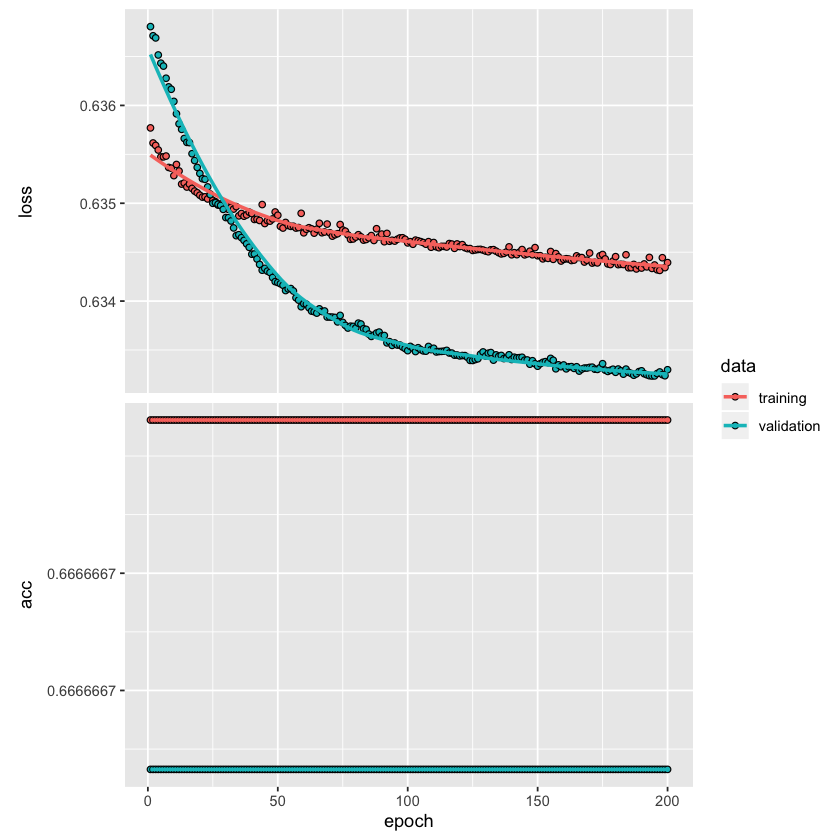

In [16]:
# Fitting the model with training data

dlmodelfit <- dlmodel %>% fit (training, 
                               traininglabels,
                              epoch=200, # number of iterations #
                              batch_size=10, # default # 
                              validation_split=0.2) # 20% of the data #
                               
plot(dlmodelfit)

In [17]:
# Evaluating the model with test data

dlmodeltest <- dlmodel %>% evaluate(testing,testinglabels) 